In [325]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

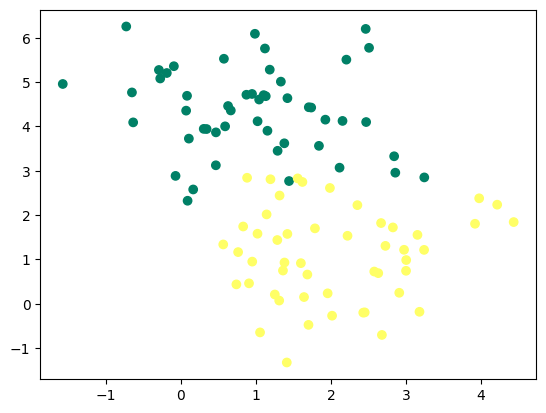

In [326]:
X,y=make_blobs(n_samples=100,n_features=2,centers=2,random_state=0)
y = y.reshape(-1, 1)
m=len(y)
plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')
plt.show()


In [327]:
X.shape[1]

2

In [328]:
#initialisation
def initialisation(X):
    W=np.random.randn(X.shape[1],1)
    b=np.random.randn(1)
    return (W,b)

In [329]:
W,b=initialisation(X)

In [330]:
W.shape

(2, 1)

In [331]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A


In [332]:
A=model(X,W,b)
A

array([[0.99680708],
       [0.77880786],
       [0.51000178],
       [0.57877624],
       [0.98770373],
       [0.89384333],
       [0.84254359],
       [0.99567116],
       [0.7501056 ],
       [0.84459446],
       [0.76578647],
       [0.90862868],
       [0.87830008],
       [0.60855121],
       [0.92459816],
       [0.9975375 ],
       [0.98526733],
       [0.67259097],
       [0.73796815],
       [0.86140751],
       [0.86557369],
       [0.77296772],
       [0.87441802],
       [0.54099409],
       [0.96999332],
       [0.82129991],
       [0.85320042],
       [0.85516025],
       [0.90370923],
       [0.96407614],
       [0.96138128],
       [0.85075147],
       [0.79435095],
       [0.96234311],
       [0.91399906],
       [0.95961674],
       [0.87163867],
       [0.94459641],
       [0.95430197],
       [0.70493149],
       [0.53679133],
       [0.97712915],
       [0.38452656],
       [0.89185155],
       [0.80213818],
       [0.95546796],
       [0.93479528],
       [0.903

In [333]:
#loss_function
def loss_function(A,y):
    L=(-1/m)*np.sum(y*np.log(A)+(1-y)*np.log(1-A))
    return L

In [334]:
L=loss_function(A,y)
L

1.0071498585611836

In [335]:
def gradient(A, X, y):
    m = len(y)
    dw = 1 / m * np.dot(X.T, A - y)
    db = 1 / m * np.sum(A - y)
    return (dw, db)


In [336]:
dw,db=gradient(A,X,y)

In [337]:
dw.shape

(2, 1)

In [338]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (100, 2)
Shape of y: (100, 1)


In [339]:
#update
def update(W,b,dw,db,learning_rate):
    W=W-learning_rate*dw
    b=b-learning_rate*db
    return W,b

In [340]:
def predict(X, W, b):
    A = model(X, W, b)
    print(A)
    y_pred = (A >= 0.5).astype(int)  # Convert probabilities to binary predictions
    return y_pred


In [341]:
def artificial_neuron(X, y, learning_rate=0.01, n_iter=1000):
    W, b = initialisation(X)
    loss_history = []

    for i in range(n_iter):
        A = model(X, W, b)
        Loss = loss_function(A, y)
        loss_history.append(Loss)
        dw, db = gradient(A, X, y)
        W, b = update(W, b, dw, db, learning_rate)
    plt.plot(loss_history)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Loss Over Iterations')
    plt.show()
    y_pred=predict(X,W,b)
    return W, b, loss_history ,y_pred,A

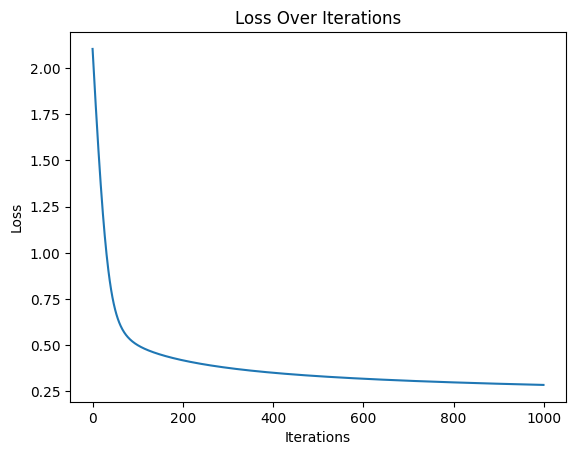

[[9.81477858e-01]
 [6.19098408e-01]
 [4.77200880e-03]
 [8.45225737e-02]
 [9.66967939e-01]
 [3.28866110e-01]
 [7.40074528e-02]
 [9.70099983e-01]
 [4.37540054e-02]
 [7.73434742e-01]
 [3.15491915e-02]
 [8.16881280e-01]
 [3.57857496e-02]
 [1.50217737e-02]
 [6.77297826e-01]
 [9.90489453e-01]
 [9.89017878e-01]
 [3.02428981e-02]
 [5.62300145e-01]
 [5.51837201e-01]
 [5.45078052e-02]
 [3.62071754e-02]
 [3.49707663e-01]
 [4.89568406e-03]
 [9.42256181e-01]
 [3.64782175e-02]
 [8.07864580e-01]
 [1.33959927e-02]
 [8.50506133e-02]
 [7.58642363e-01]
 [9.66995074e-01]
 [5.10875124e-02]
 [5.31030860e-01]
 [9.67759653e-01]
 [3.95410106e-01]
 [3.07568331e-01]
 [6.88993698e-01]
 [5.62491926e-01]
 [5.11934534e-01]
 [3.09831255e-01]
 [4.24813490e-02]
 [1.53086171e-01]
 [8.65403207e-04]
 [1.74891860e-01]
 [1.64089668e-01]
 [8.24581280e-01]
 [9.42986200e-01]
 [9.24687718e-01]
 [3.54227152e-03]
 [1.16934426e-02]
 [9.06887113e-01]
 [4.13551021e-01]
 [1.04343304e-01]
 [5.55428070e-02]
 [8.76151872e-01]
 [5.133329

In [342]:
W,b,loss_history,y_pred,A=artificial_neuron(X,y)

In [343]:
W ,b

(array([[ 1.51940035],
        [-0.87125881]]),
 array([-0.49294393]))

In [344]:
score=accuracy_score(y,y_pred)

In [345]:
print(score)

0.86


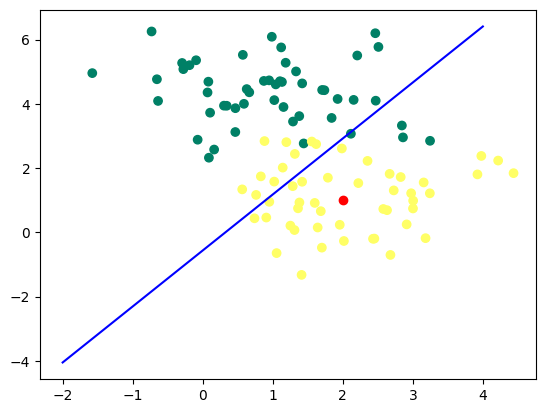

[0.84218789]


array([1])

In [346]:
new_plante=np.array([2,1])
plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')
plt.scatter(new_plante[0],new_plante[1],c='r')
x1=np.linspace(-2,4,100)
x2=(-b-W[0]*x1)/W[1]
plt.plot(x1,x2,c='b')
plt.show()
predict(new_plante,W,b)

In [347]:
import plotly.graph_objects as go

In [350]:
fig = go.Figure(data=[go.Scatter3d( 
    x=X[:, 0].flatten(),
    y=X[:, 1].flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(),                
        colorscale='YlGn',  
        opacity=0.8,
        reversescale=True
    )
)])

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

In [352]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = W[0] * xx0 + W[1] * xx1 + b
A = 1 / (1 + np.exp(-Z))

fig = (go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='YlGn', opacity = 0.7, reversescale=True)]))

fig.add_scatter3d(x=X[:, 0].flatten(), y=X[:, 1].flatten(), z=y.flatten(), mode='markers', marker=dict(size=5, color=y.flatten(), colorscale='YlGn', opacity = 0.9, reversescale=True))


fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()